# Importation des différentes librairies pour nettoyer et analyser la base de données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import os
import time

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Fonction pour analyser le code au fur et à mesure du nettoyage

In [2]:
def data_check(data):
    print("\n###################################################\n")
    print(data.info())
    print("\n###################################################\n")
    print("The DataFrame contains", data.shape[0], "rows and", data.shape[1], "columns")
    print("The DataFrame has",data.isna().sum().sum(),"missing values. It is completed at", 100 - round(((data.isna().sum().sum() / (data.shape[0]*data.shape[1]))) * 100, 2), "%")
    print("\n###################################################\n")

# Import du dataset et analyse primaire

In [4]:
data = pd.read_csv('CleanedOpenFoodFacts.csv', sep="\t",low_memory=False)
print("import done")
data.head()

import done


,level_0,index,code,created_datetime,last_modified_datetime,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,energy-from-fat_100g,...,caffeine_100g,taurine_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,year_created,year_modified
0,0,0,3087,2016-09-17 09:17:46+00:00,2016-09-17 09:18:13+00:00,Ferme t'y R'nao,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,2016
1,4,4,16094,2017-03-09 10:34:13+00:00,2017-03-09 10:34:13+00:00,Bob's Red Mill,NaN,NaN,1552.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,2017
2,6,6,16117,2017-03-09 10:35:30+00:00,2017-03-09 10:35:30+00:00,Lundberg,NaN,NaN,1490.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,2017
3,9,9,16513,2017-03-09 10:34:14+00:00,2017-03-09 10:34:14+00:00,Napa Valley Naturals,NaN,NaN,3586.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,2017
4,10,10,16612,2017-03-09 10:35:31+00:00,2017-03-09 10:35:31+00:00,Unfi,NaN,NaN,1393.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,2017


Graphe (pie chart) montrant les proportion de nutrigrade du dataset


Some foods are not concerned by nutriscore (QR_scientifique_technique_EN_190927-1.pdf)
Data that lack a nutriscore:
nutrition_grade_fr
False    200042
True      98266
Name: count, dtype: int64

----------- Nutrigrade analysis -----------

Not all product gave a nutrigrade
There is 33.0% of data without a nutrigrade
The 2 worst grades (D & E) represent 48.0 % of the Nutrigrade data
application idea : half of the time a better product can be suggested (A, B, C)

...........................................


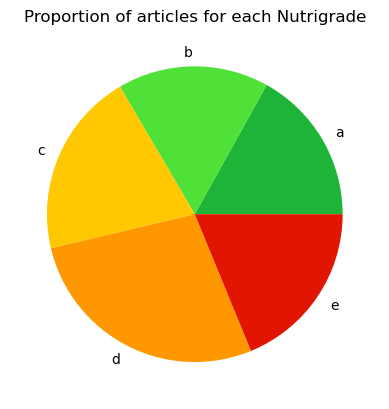

<Figure size 300x300 with 0 Axes>

In [5]:
print (f"\nSome foods are not concerned by nutriscore (QR_scientifique_technique_EN_190927-1.pdf)\nData that lack a nutriscore:\n{data.nutrition_grade_fr.isnull().value_counts()}")
print("\n----------- Nutrigrade analysis -----------\n")
print("Not all product gave a nutrigrade")
print(f"There is {round(100 - data.groupby('nutrition_grade_fr')['code'].count().sum()/data.shape[0]*100,0)}% of data without a nutrigrade")
print(f"The 2 worst grades (D & E) represent {round((data.groupby('nutrition_grade_fr')['code'].count()[2:4].sum()/data.groupby('nutrition_grade_fr')['code'].count().sum())*100,0)} % of the Nutrigrade data")
print("application idea : half of the time a better product can be suggested (A, B, C)")
print("\n...........................................")
data.groupby('nutrition_grade_fr')['code'].count().plot(kind='pie', title="Proportion of articles for each Nutrigrade", ylabel="",colors=['#1eb438', '#4fe137', '#ffc800', '#ff9700', '#e11502'])
plt.figure(figsize=(3,3))
plt.show()

# comparer les marques

In [24]:
data.brands.fillna("unknown", inplace=True)

<Axes: ylabel='brands'>

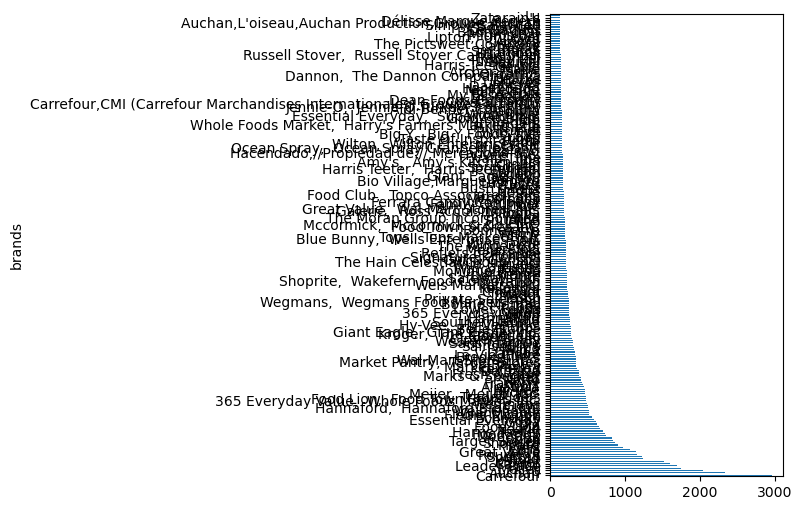

In [38]:
data.brands.value_counts()[1:200].plot.barh(figsize=(3,6))

In [59]:
data.brands.value_counts()

brands
unknown                                   28094
Carrefour                                  2957
Auchan                                     2327
U                                          2036
Meijer                                     1745
                                          ...  
Carla,Laila,Bono                              1
GFM                                           1
Beauce Cola,Maison Savouré                    1
Limonade La Beauceronne,Maison Savouré        1
乐吧                                            1
Name: count, Length: 56493, dtype: int64

brands
unknown                                   28094
Carrefour                                  2957
Auchan                                     2327
U                                          2036
Meijer                                     1745
                                          ...  
Carla,Laila,Bono                              1
GFM                                           1
Beauce Cola,Maison Savouré                    1
Limonade La Beauceronne,Maison Savouré        1
乐吧                                            1
Name: count, Length: 56493, dtype: int64

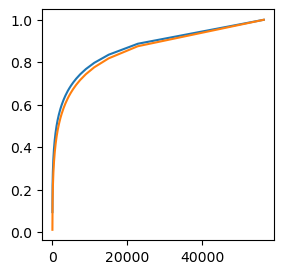

In [60]:
display(data.brands.value_counts())

plt.figure(figsize=(3,3))
plt.plot(range(len(data.brands.value_counts())), data.brands.value_counts().cumsum() / data.brands.value_counts().sum())
plt.plot(range(len(data.brands.value_counts())-1), data.brands.value_counts()[1:].cumsum() / data.brands.value_counts()[1:].sum())
plt.show()

# Comparer l'énergie forunie par chacune des catégories

In [6]:
data['NRJ_fat'] = data['fat_100g'].values * 37
data['NRJ_carb'] = data['carbohydrates_100g'].values * 17
data['NRJ_prot'] = data['proteins_100g'].values * 17

/var/folders/dv/gzhyqctn53s9bh23g7tbvl940000gn/T/ipykernel_25411/1084535048.py:6: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


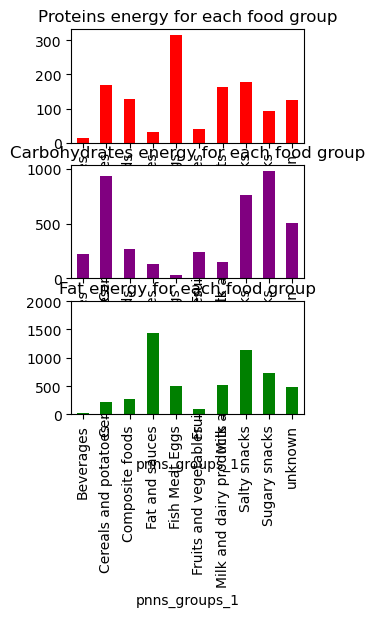

In [20]:

fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(3,5))
plt.ylim(0,2000)
data.groupby('pnns_groups_1')['NRJ_prot'].mean().plot(kind='bar',title="Proteins energy for each food group",color='red', ax=ax1)
data.groupby('pnns_groups_1')['NRJ_carb'].mean().plot(kind='bar',title="Carbohydrates energy for each food group", color='purple', ax=ax2)
data.groupby('pnns_groups_1')['NRJ_fat'].mean().plot(kind='bar',title="Fat energy for each food group",color='g', ax=ax3)
plt.tight_layout()
plt.show()

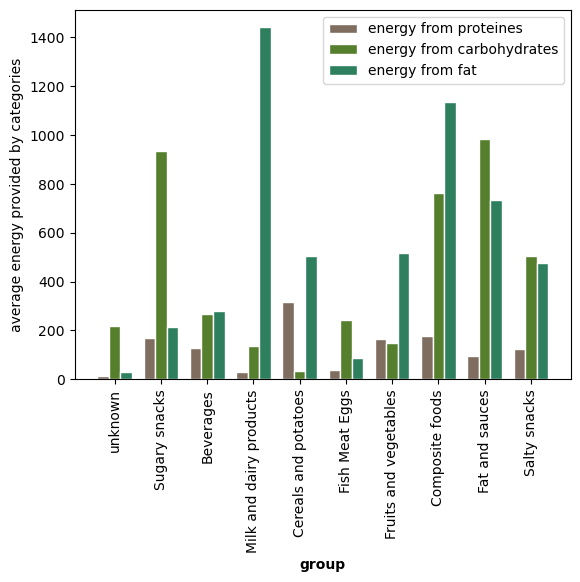

In [7]:
barWidth = 0.25
bars1 = data.groupby('pnns_groups_1')['NRJ_prot'].mean()
bars2 = data.groupby('pnns_groups_1')['NRJ_carb'].mean()
bars3 = data.groupby('pnns_groups_1')['NRJ_fat'].mean()
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='energy from proteines')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='energy from carbohydrates')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='energy from fat')
plt.xlabel('group', fontweight='bold')
plt.ylabel('average energy provided by categories')
plt.xticks([r + barWidth for r in range(len(bars1))], data.pnns_groups_1.value_counts().index,rotation = 90)
plt.legend()
plt.show()

# repartition des produits par catégories

############################################
-------- pnns_groups_1 analysis -------------

Only 30.0 % of the data is ascribed to a category
Among categorized data, 7.0 % of it is 'unknown'
application idea : to suggest other product categorized with PCA based on ingredient(energy) content
............................................


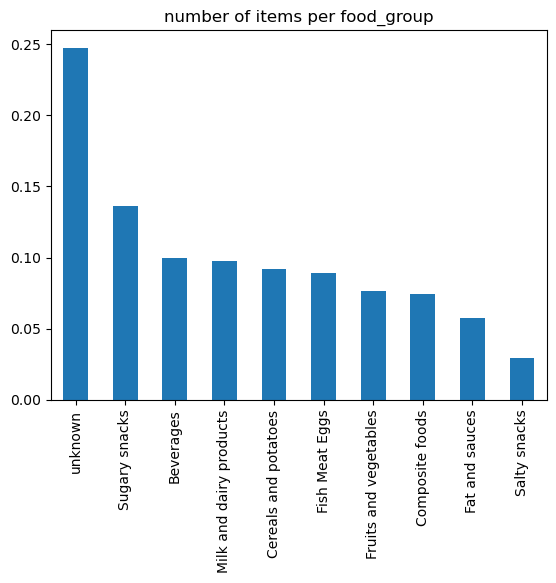

In [8]:
print("############################################")
print("-------- pnns_groups_1 analysis -------------\n")
print("Only", round(data["pnns_groups_1"].value_counts().sum()/data.shape[0]*100,0) , "% of the data is ascribed to a category")
print("Among categorized data,", round(data["pnns_groups_1"].value_counts()[0].sum()/data.shape[0]*100,0),"% of it is 'unknown'")
print("application idea : to suggest other product categorized with PCA based on ingredient(energy) content")
print("............................................")
data["pnns_groups_1"].value_counts(normalize=True).plot(kind='bar', title="number of items per food_group") # 4 categories can be mixed "they are separated by "-"
plt.show()

# Reformate les colonnes temps car csv ne semble pas sauvegader cette info

In [9]:
for col in data.columns:                                                 # formate "time" columns
    if col.endswith("_datetime"):
        data[col] = pd.to_datetime(data[col], errors='coerce') 

# Graphe montrant l'évolution du nutrigrade au cours du temps

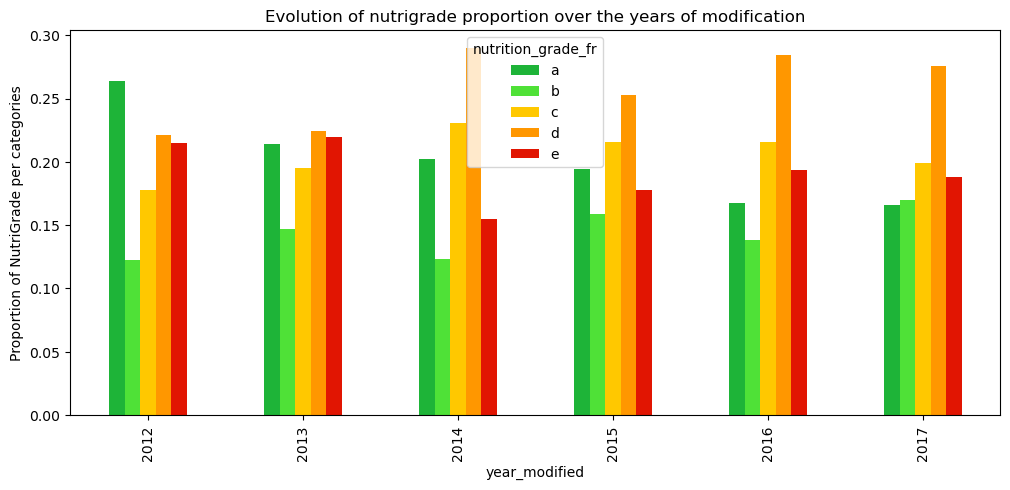

the proportion per year of ABC vs DE products evolved ==> a deeper analysis is required to assess if there is a relationship between degrading products nutrition grade with year


In [10]:
data['year_created'] = data['created_datetime'].dt.year
data['year_modified'] = data['last_modified_datetime'].dt.year
to_plot = data.groupby(['year_modified'])['nutrition_grade_fr'].value_counts(normalize =True).sort_values().unstack()
to_plot.plot(kind = "bar", title="Evolution of nutrigrade proportion over the years of modification",ylabel="Proportion of NutriGrade per categories", color=['#1eb438', '#4fe137', '#ffc800', '#ff9700', '#e11502'],figsize=(12,5))
plt.show()
print("the proportion per year of ABC vs DE products evolved ==> a deeper analysis is required to assess if there is a relationship between degrading products nutrition grade with year")

Graphes permettant de comparer des lignes d'ingredients

Analyse ANOVA des groupes de produits vs nutriscore

Fonction pour analyse ANOVA

In [11]:
def plotANOVA(groupes,modalites):
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}   # select colors for mean values plot
    plt.figure(figsize=(3,5)) 
    plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
    plt.show()
    
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])                                        # variation totale (Total Sum of Squares) 
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])          # variation interclasse (Sum of Squares of the Model)
    return SCE/SCT

# Analyse ANOVA entre groupe de produits et NRJ_prot

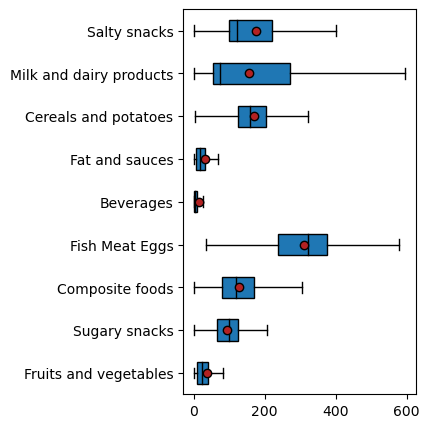

 The calculated etha squarre of 0.46450537003288755 indicates no relationship between food categories and nitroscore_fr
therefore it is not recomanded to impute missing nutriscore values by the mean of categories


In [12]:
X = "pnns_groups_1"                       # qualitative
Y = "NRJ_prot"             # quantitative
subset = data[data["NRJ_fat"].isna()==False].copy().fillna(0)            # only rows with values, replace nan values with 0
subset = subset[(subset["pnns_groups_1"] != "unknown")&(subset["pnns_groups_1"] != 0)]   # remove category 'unknow' et 0
modalites = subset[X].unique()                                                           # classify the qualitative datasets
groupes = []
for m in modalites:
    groupes.append(subset[subset[X]==m][Y])                       # assign quantitative values to qualitative sets
plotANOVA(groupes,modalites)
print(f" The calculated etha squarre of {eta_squared(subset[X],subset[Y])} indicates no relationship between food categories and nitroscore_fr")
print("therefore it is not recomanded to impute missing nutriscore values by the mean of categories")

# Analyse ANOVA du nutrigrade vs nutriscore pour la catégorie Fish 'Meat Eggs'

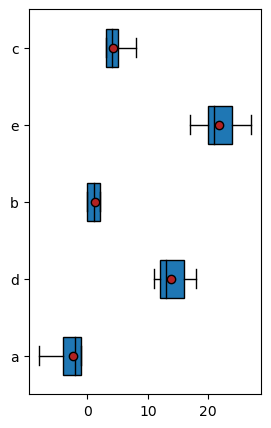

 The calculated eta squarre of 0.9493193341843078 indicates a strong relationship between nutrigrade_fr and nitroscore_fr...


In [13]:
X = "nutrition_grade_fr"                     # qualitative
Y = "nutrition-score-fr_100g"                # quantitative
subset = data[~data["nutrition-score-fr_100g"].isna()].copy().fillna(0)            # only rows with values, replace nan values with 0
subset = subset[subset["pnns_groups_1"] == 'Fish Meat Eggs']           # remove category 'unknow' et 0
modalites = subset[X].unique()                                                         # classify the qualitative datasets
groupes = []
for m in modalites:
    groupes.append(subset[subset[X]==m][Y])                       # assign quantitative values to qualitative sets
plotANOVA(groupes,modalites)
print(f" The calculated eta squarre of {eta_squared(subset[X],subset[Y])} indicates a strong relationship between nutrigrade_fr and nitroscore_fr...")

# Analyse ANOVA comparant le nutritionscore des 10 brands avec le plus de produits pour une categorie spécifique (ex Beverages)

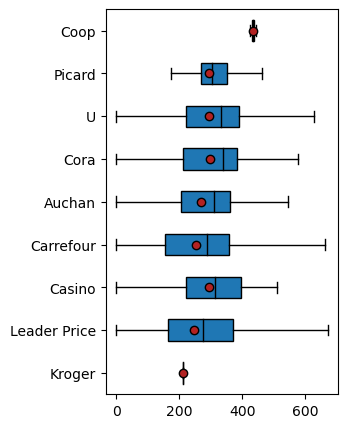

 The calculated eta squarre of 0.020255675088067596 indicates a small to medium size effet for Fish Meat Eggs category


In [14]:
#hypothesis that some brands have healthier products 
X = "brands"                                 # qualitative
Y = "NRJ_prot"                # quantitative
subset = data[data["pnns_groups_1"] == 'Fish Meat Eggs'].copy().fillna(0)                                     # filter chosen categorie product
subset = subset[subset["brands"].isin(data.brands.value_counts().index[data.brands.value_counts()>800])]   # filter only most filled brands
modalites = subset[X].unique()
groupes = []
for m in modalites:
    groupes.append(subset[subset[X]==m][Y])
plotANOVA(groupes,modalites)
print(f" The calculated eta squarre of {eta_squared(subset[X],subset[Y])} indicates a small to medium size effet for Fish Meat Eggs category")

#Salty snacks                  *  0.030    small to medium effect
#[nan,
#'unknown',                       0.006
#'Fruits and vegetables',       * 0.012       small to medium effect
# 'Sugary snacks',                0.009
# 'Cereals and potatoes',         0.007
# 'Composite foods',            * 0.016             small to medium effect
# 'Fish Meat Eggs',               0.007
# 'Beverages',                    0.010
# 'Fat and sauces',               0.008
# 'Milk and dairy products',      0.013

# Analyse du Chi2 pour comparer la date de modification et le nutrigrade

The contigency table between year_modified and nutrition_grade_fr is:

nutrition_grade_fr      a      b      c      d      e   Total
year_modified                                                
2012                   43     20     29     36     35     163
2013                  124     85    113    130    127     579
2014                  482    294    550    691    369    2386
2015                 2850   2328   3152   3702   2607   14639
2016                 3572   2946   4591   6049   4129   21287
2017                26774  27399  32081  44406  30328  160988
Total               33845  33072  40516  55014  37595  200042


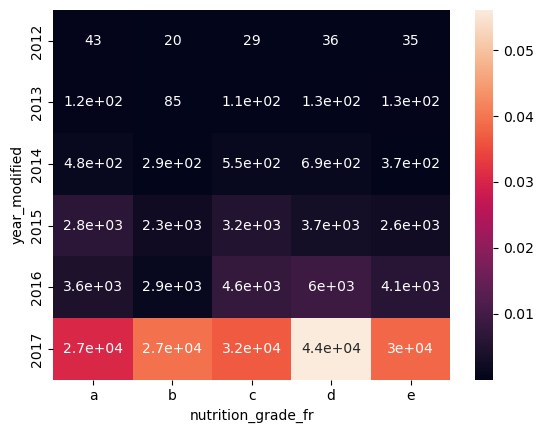

            --------------------- 
the heatmap doesn't allow to ascertain a relationship between -year_modified- and -nutrition_grade_fr-
            --------------------- 




In [15]:
# Select the data
X = "year_modified"
Y = "nutrition_grade_fr"
#prepare the data
cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
print(f"The contigency table between {X} and {Y} is:\n\n{cont}")
import seaborn as sns
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:] 
n = len(data)
indep = tx.dot(ty) / n
c = cont.fillna(0) 
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()
print("            --------------------- ")
print(f"the heatmap doesn't allow to ascertain a relationship between -{X}- and -{Y}-")
print("            --------------------- \n\n")

# Analyse du Chi2 pour comparer les catégories de produits et le nutrigrade

The contigency table between pnns_groups_1 and nutrition_grade_fr is:

nutrition_grade_fr           a     b      c      d      e  Total
pnns_groups_1                                                   
Beverages                  256   819   1563    907   2143   5688
Cereals and potatoes      3392  1039   1308    795    104   6638
Composite foods           1304  1761   1583    866     70   5584
Fat and sauces              93   242    967   1668    726   3696
Fish Meat Eggs             539   736   1442   1578   1058   5353
Fruits and vegetables     2934   706    487     47      3   4177
Milk and dairy products    637  1377   1695   2885    265   6859
Salty snacks                51    78    608   1094    353   2184
Sugary snacks               59   178    822   3556   4853   9468
unknown                   1607  1867   2500   3063   1892  10929
Total                    10872  8803  12975  16459  11467  60576


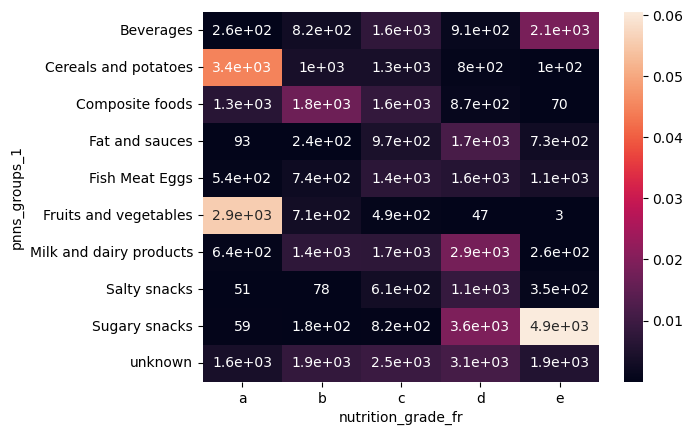

            --------------------- 
the heatmap indicates that a relationship may exist between -pnns_groups_1- and -nutrition_grade_fr-
            --------------------- 




In [16]:
# Select other data
X = "pnns_groups_1"
Y = "nutrition_grade_fr"
cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
print(f"The contigency table between {X} and {Y} is:\n\n{cont}")
import seaborn as sns
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n
c = cont.fillna(0) 
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()
print("            --------------------- ")
print(f"the heatmap indicates that a relationship may exist between -{X}- and -{Y}-")
print("            --------------------- \n\n")

# Analyse du Chi2 pour comparer les catégories de produits et le nutrigrade

The contigency table between pnns_groups_1 and brands is:

brands                   Ahold  Auchan  Carrefour  Casino  Coop   Cora  \
pnns_groups_1                                                            
Beverages                  NaN   171.0      221.0   159.0   7.0  132.0   
Cereals and potatoes       NaN   193.0      274.0   147.0   3.0   76.0   
Composite foods            NaN   144.0      232.0   179.0   1.0  108.0   
Fat and sauces             NaN   118.0      153.0    62.0   2.0   55.0   
Fish Meat Eggs             NaN   184.0      303.0   104.0   2.0  142.0   
Fruits and vegetables      NaN   158.0      233.0   110.0   1.0   96.0   
Milk and dairy products    NaN   167.0      237.0   102.0   4.0   86.0   
Salty snacks               NaN    62.0       95.0    45.0   1.0   45.0   
Sugary snacks              NaN   191.0      331.0   155.0   3.0  142.0   
unknown                    1.0   303.0      333.0   134.0  39.0   82.0   
Total                      1.0  1691.0     2412.0  11

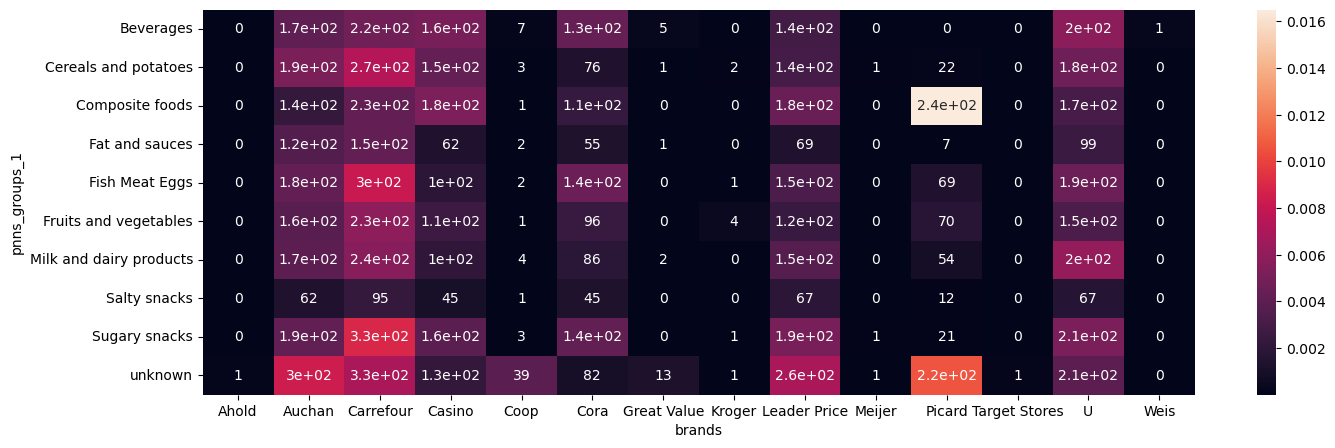

            --------------------- 
the heatmap indicates that a relationship may exist between -pnns_groups_1- and -brands-
            --------------------- 




In [17]:
subset = data[data["brands"].isin(data.brands.value_counts().index[data.brands.value_counts()>800])] 
X = "pnns_groups_1"
Y = "brands"
cont = subset[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
print(f"The contigency table between {X} and {Y} is:\n\n{cont}")
import seaborn as sns
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n
c = cont.fillna(0) 
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
plt.figure(figsize = (16,5))
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()
print("            --------------------- ")
print(f"the heatmap indicates that a relationship may exist between -{X}- and -{Y}-")
print("            --------------------- \n\n")

# analyse de correlations (quels types d'aliments contiennent beaucoup de sel?)

the correlation graphs indicates fibers content is correlated to cabrohydrates content, not much info about salt content


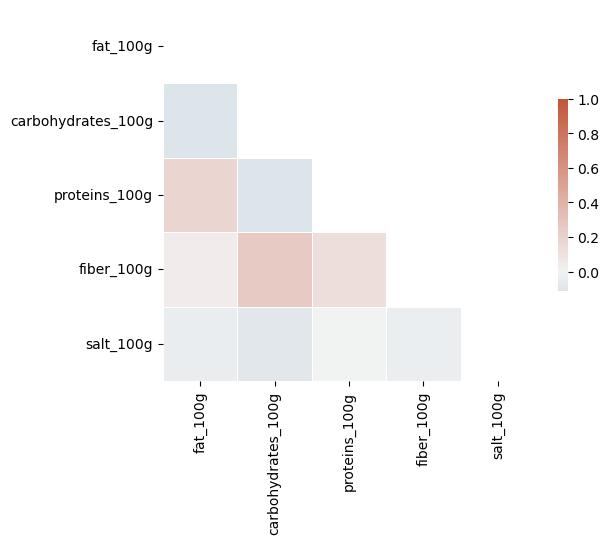

In [18]:
corr = data[['fat_100g','carbohydrates_100g','proteins_100g','fiber_100g','salt_100g']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(6, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print("the correlation graphs indicates fibers content is correlated to cabrohydrates content, not much info about salt content")

# réaliser une ACP

## préparer les données

In [19]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns


X = data.groupby('pnns_groups_1')['fat_100g','carbohydrates_100g','proteins_100g','fiber_100g','salt_100g'].aggregate('mean')
datas = X.values
names = X.index
features = X.columns
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
#------ check scaler is good
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :] ## mean = 0 and std = 1
#-------

/var/folders/dv/gzhyqctn53s9bh23g7tbvl940000gn/T/ipykernel_16705/2812483247.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  X = data.groupby('pnns_groups_1')['fat_100g','carbohydrates_100g','proteins_100g','fiber_100g','salt_100g'].aggregate('mean')


,0,1,2,3,4
mean,0.00,0.00,-0.00,0.00,-0.00
std,1.05,1.05,1.05,1.05,1.05


## acp

In [20]:
n_components = 5
pca = PCA(n_components=n_components)
pca.fit(X_scaled)
print("les 2 premieres composantes permettent d'expliquer",round(pca.explained_variance_ratio_[:2].sum()*100,2),"% de la variance")

les 2 premieres composantes permettent d'expliquer 72.07 % de la variance


## plotting the PCA result

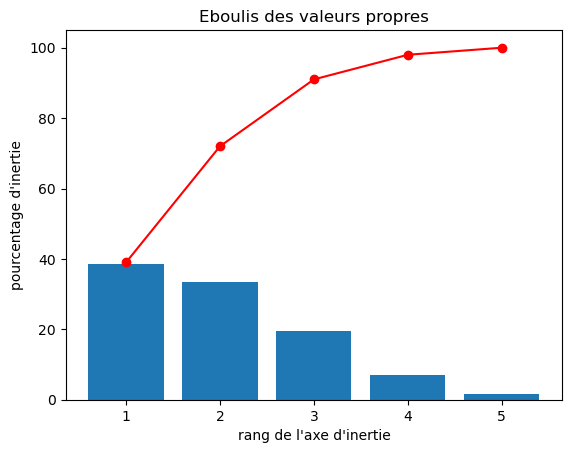

In [21]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
x_list = range(1, n_components+1)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

As seen in the analysis of correlation, the first principal componant F1 positivelly correlated carbohydrates and fibers


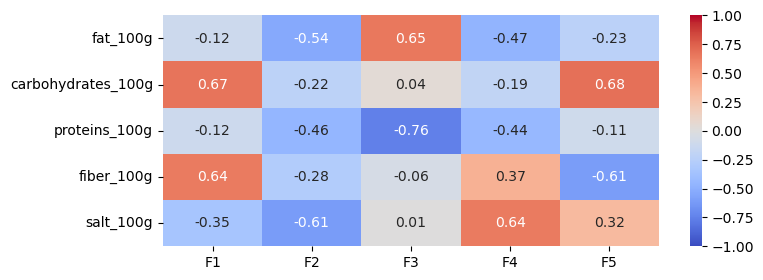

In [22]:
pcs = pd.DataFrame(pca.components_)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
fig, ax = plt.subplots(figsize=(8, 3))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
print("As seen in the analysis of correlation, the first principal componant F1 positivelly correlated carbohydrates and fibers")

## cercle des correlations

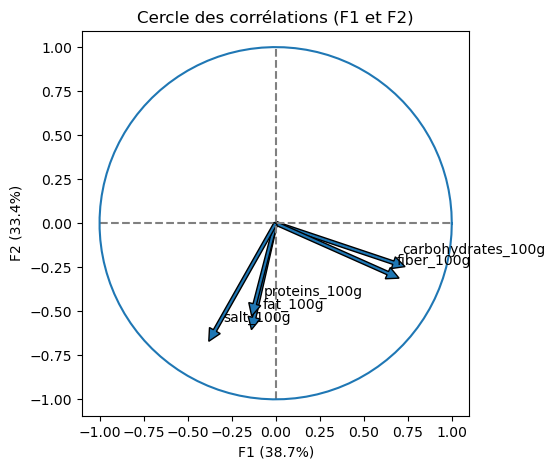

le cercle des correlations nous indique que les produits contenants du sels seront en generals ceux contenant aussi des fats et des proteines


In [23]:
x, y = 0,1
fig, ax = plt.subplots(figsize=(5, 5))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)
print("le cercle des correlations nous indique que les produits contenants du sels seront en generals ceux contenant aussi des fats et des proteines")